In [59]:
from __future__ import unicode_literals, print_function
import csv, os
import pandas as pd
import plotnine
from plotnine import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mizani.breaks import date_breaks
from mizani.formatters import date_format
%matplotlib inline

pol_data = list(csv.reader(open(r'E:\Programming\python\창회선배스터디\SSAbasedTrend\1-SO-SSAbasedTrend-InputSample.t.csv', 'r', encoding='cp949')))[1:]

pol_res = {}

def insert_label(result_dict, date, label):
    if label == 'POSITIVE': result_dict[date][0] += 1
    else: result_dict[date][1] += 1
    return result_dict

for date, label in pol_data:
    if date in pol_res.keys(): pol_res = insert_label(pol_res, date, label)
    else:
        pol_res[date] = [0, 0]
        pol_res = insert_label(pol_res, date, label)

date_lst = list(pol_res.keys())
sent_lst = list(pol_res.values())
pos_lst = []
neg_lst = []

for x in range(0,len(sent_lst)):
    pos_lst.append(sent_lst[x][0])

for y in range(0, len(sent_lst)):
    neg_lst.append(sent_lst[y][1])


           date  Positive  Negative
0    2015-04-16         1         0
1    2015-05-05         1         0
2    2015-06-07         1         0
3    2015-06-13         1         0
4    2015-06-14         2         0
..          ...       ...       ...
591  2017-09-21         3         0
592  2017-09-22         2         0
593  2017-09-23         2         0
594  2017-09-24         1         0
595  2017-09-27         1         0

[596 rows x 3 columns]


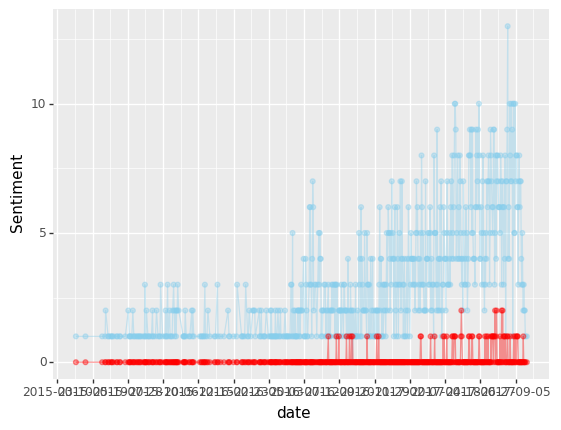

<ggplot: (-9223371899038519392)>

In [65]:
pol_df = pd.DataFrame({'date' : date_lst,
                      'Positive' : pos_lst,
                      'Negative' : neg_lst})
pol_df.head()

print(pol_df)


(
    ggplot(pol_df)
    + geom_point(aes(x='date', y='Positive'),color='skyblue',alpha=0.4)
    + geom_line(aes(x='date', y='Positive'),color='skyblue',alpha=0.4,group=1)
    + geom_point(aes(x='date', y='Negative'),color='red',alpha=0.4)
    + geom_line(aes(x='date', y='Negative'),color='red',alpha=0.4,group=2)
    + scale_x_datetime(breaks=date_breaks('10 weeks'))
    + xlab('date')
    + ylab('Sentiment')
)

In [16]:
n = 10
df = pd.DataFrame({'x': np.arange(n),
                   'y': np.arange(n),
                   'yfit': np.arange(n) + np.tile([-.2, .2], n//2),
                   'cat': ['a', 'b']*(n//2)})
print(df)

   x  y  yfit cat
0  0  0  -0.2   a
1  1  1   1.2   b
2  2  2   1.8   a
3  3  3   3.2   b
4  4  4   3.8   a
5  5  5   5.2   b
6  6  6   5.8   a
7  7  7   7.2   b
8  8  8   7.8   a
9  9  9   9.2   b
